## Tutorial Notebook - Checkmate Sample

Short notebook to show how to use the two checkerboard functions. These could be used for spatial sampling of earth systems science data. 

Any problems or questions, feel free to email tmartin at ucar dot edu 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import LinearSegmentedColormap

In [28]:
!pip install --upgrade pip

In [29]:
!pip install CheckmateSample --upgrade

In [30]:
from CheckmateSample.generator import make_checkerboard, make_checkerboard_xr

In [31]:
def plot_checkerboard(checkerboard: np.ndarray, title: str):
    plt.figure(figsize=(10, 10))
    
    # Create a custom colormap that goes from white to blue
    colors = ['white', 'blue']
    n_bins = 100  # Number of color gradations
    cmap = LinearSegmentedColormap.from_list('custom_blues', colors, N=n_bins)
    
    # Create a meshgrid for pcolor
    ny, nx = checkerboard.shape
    x = np.arange(0, nx + 1)
    y = np.arange(0, ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Plot the checkerboard with individual cell borders
    plt.pcolor(X, Y, checkerboard, cmap=cmap, edgecolors='black', linewidths=1)
    
    plt.title(title)
    cbar = plt.colorbar(ticks=np.unique(checkerboard))
    cbar.set_label('Value')
    
    # Set aspect ratio to equal for square cells
    plt.gca().set_aspect('equal')
    
    # Remove axes
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [32]:
# Example usage
board_size = (32, 32)
square_size = (3, 3)
separation_size = 2

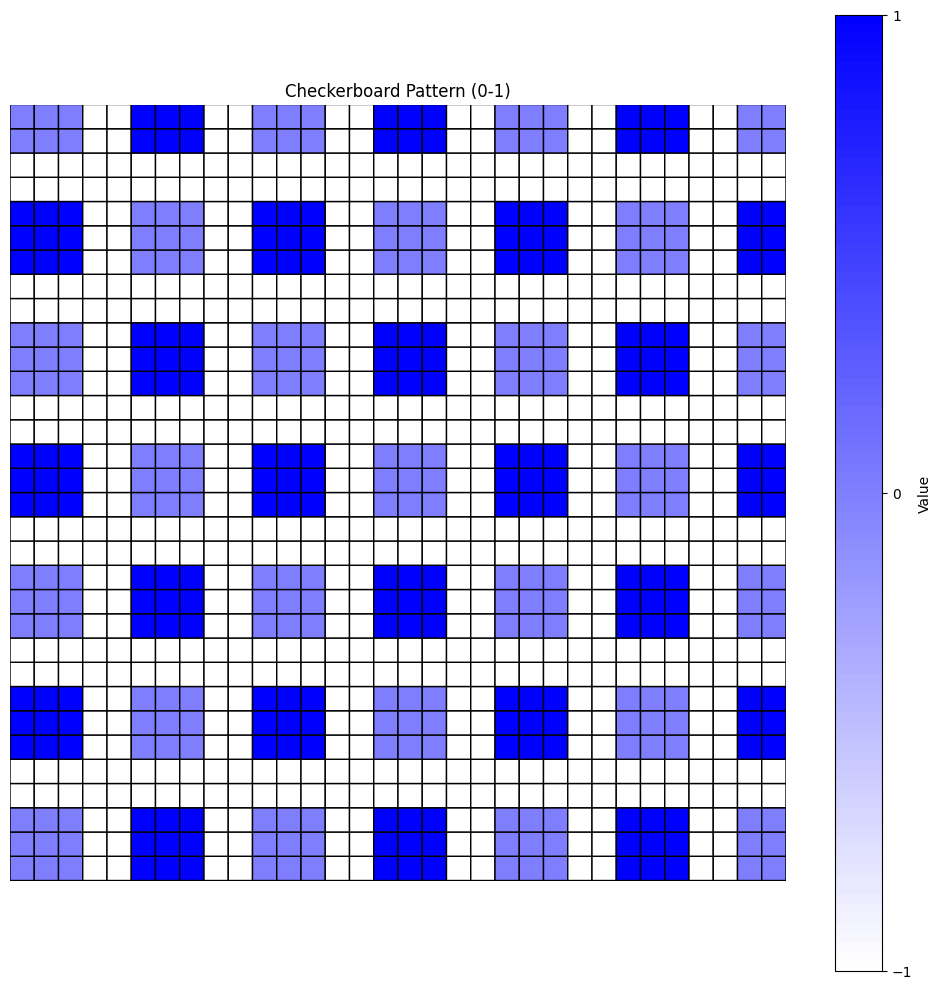

In [33]:
# Plot original 0-1 pattern
checkerboard_01 = make_checkerboard(board_size, square_size, separation_size)
plot_checkerboard(checkerboard_01, "Checkerboard Pattern (0-1)")

In [34]:
checkerboard_01.shape

(32, 32)

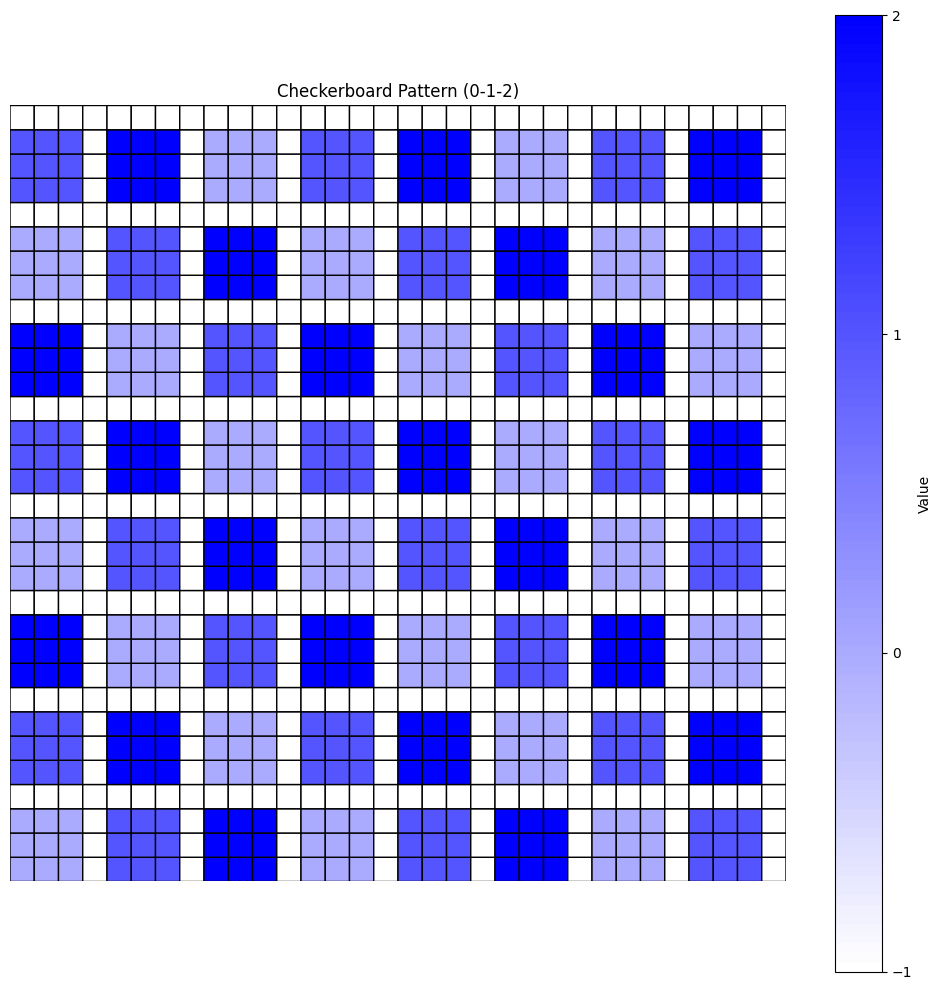

In [35]:
# Plot new 0-1-2 pattern
checkerboard_012 = make_checkerboard(board_size, square_size, separation_size=1, validation=True)
plot_checkerboard(checkerboard_012, "Checkerboard Pattern (0-1-2)")

In [36]:
checkerboard_012.shape

(32, 32)

## Xarray DataArray 

We will want to do the same thing with xarray datasets

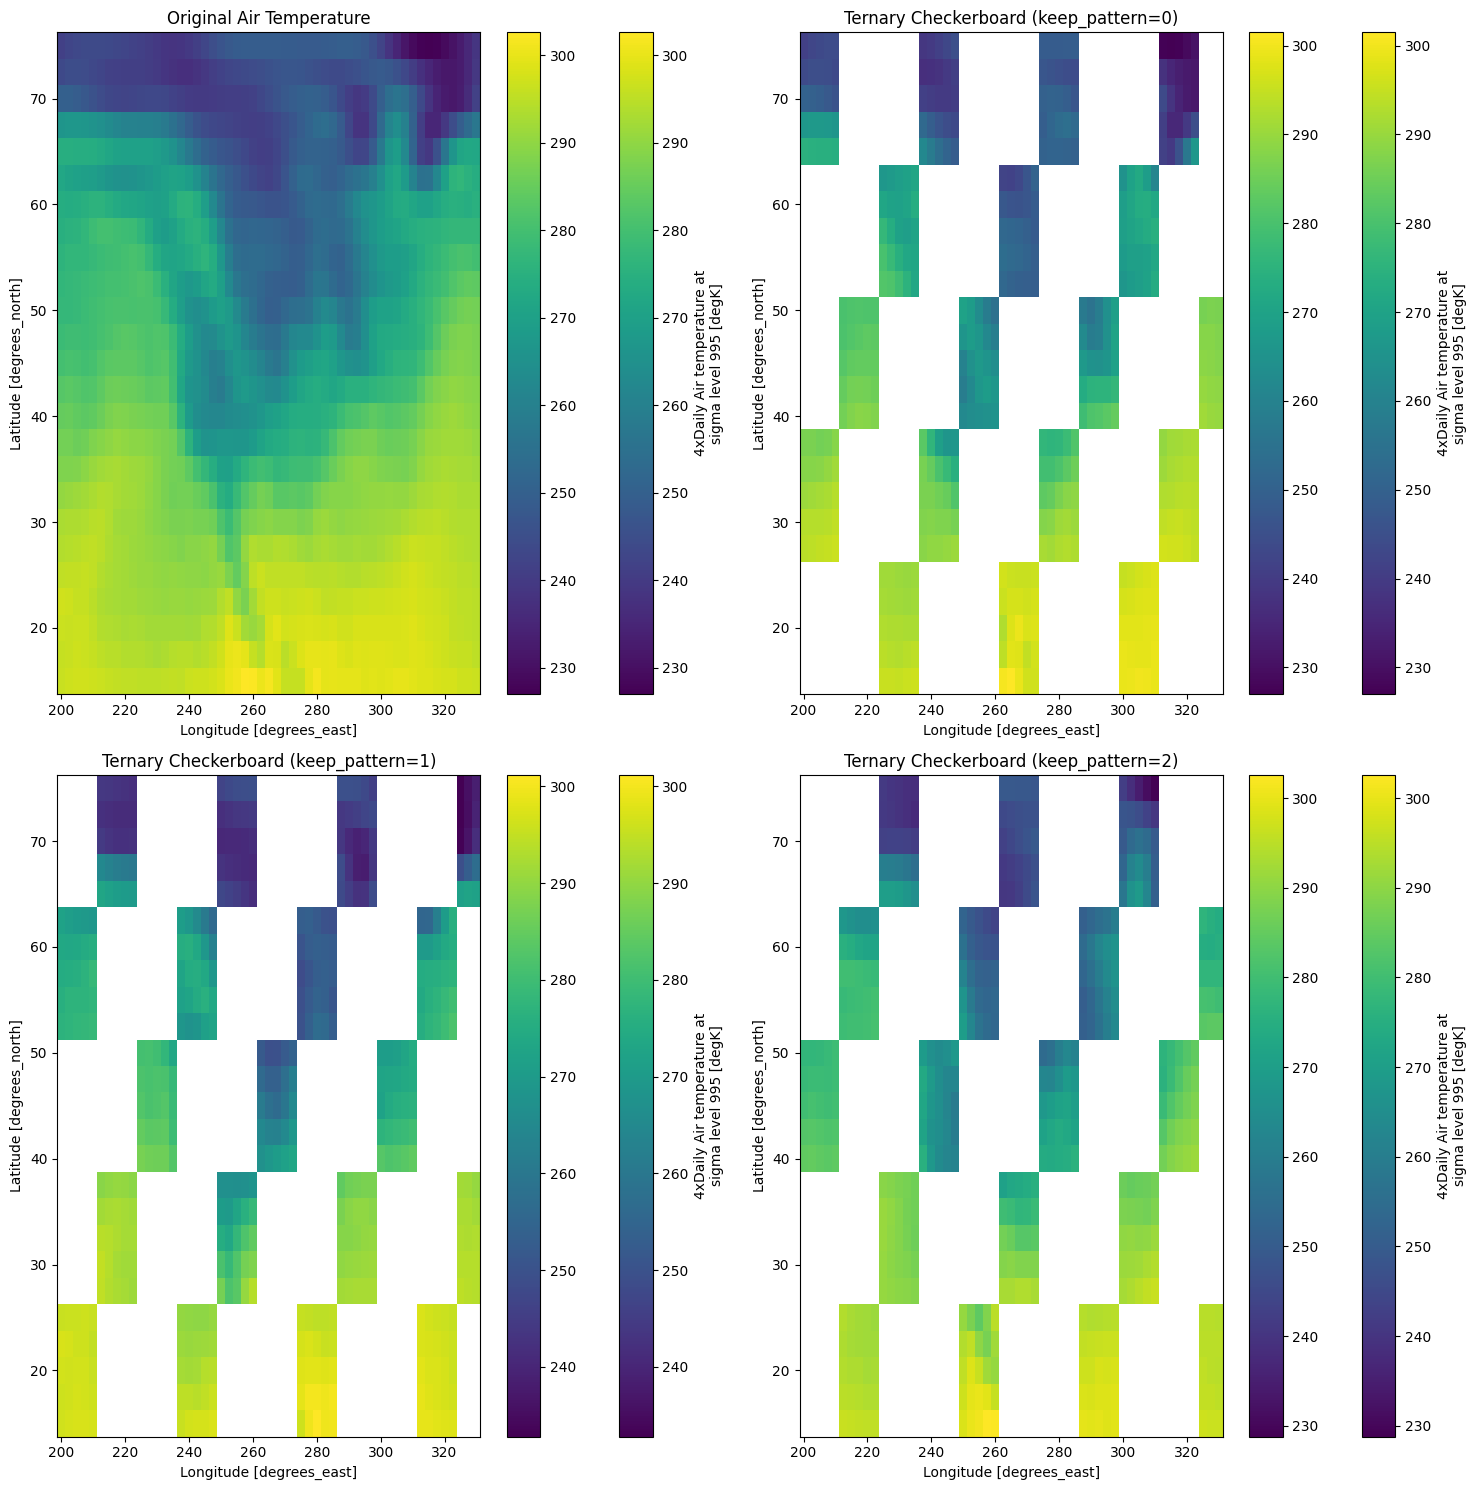


Updated Dataset:
<xarray.Dataset> Size: 31MB
Dimensions:             (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat                 (lat) float32 100B 75.0 72.5 70.0 ... 20.0 17.5 15.0
  * lon                 (lon) float32 212B 200.0 202.5 205.0 ... 327.5 330.0
  * time                (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T...
Data variables:
    air                 (time, lat, lon) float64 31MB 241.2 242.5 ... 295.7
    checkerboard_air_0  (lat, lon) float64 11kB 241.2 242.5 243.5 ... nan nan
    checkerboard_air_1  (lat, lon) float64 11kB nan nan nan nan ... nan nan nan
    checkerboard_air_2  (lat, lon) float64 11kB nan nan nan ... 296.8 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Are all values from the original data preserved?
Tru

In [37]:
# Load the example dataset
ds = xr.tutorial.load_dataset('air_temperature')

# Select a single time slice for simplicity
air_temp = ds.air.isel(time=0)

# Apply the checkerboard pattern for all three parts of the ternary pattern
square_size = (5, 5)  # 5x5 pixel squares
checkerboard_temp_0 = make_checkerboard_xr(air_temp, square_size, keep_pattern=0, validation=True)
checkerboard_temp_1 = make_checkerboard_xr(air_temp, square_size, keep_pattern=1, validation=True)
checkerboard_temp_2 = make_checkerboard_xr(air_temp, square_size, keep_pattern=2, validation=True)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Original data
im0 = air_temp.plot(ax=axs[0, 0], cmap='viridis')
axs[0, 0].set_title('Original Air Temperature')
plt.colorbar(im0, ax=axs[0, 0])

# Checkerboard pattern applied (keep_pattern=0)
im1 = checkerboard_temp_0.plot(ax=axs[0, 1], cmap='viridis')
axs[0, 1].set_title('Ternary Checkerboard (keep_pattern=0)')
plt.colorbar(im1, ax=axs[0, 1])

# Checkerboard pattern applied (keep_pattern=1)
im2 = checkerboard_temp_1.plot(ax=axs[1, 0], cmap='viridis')
axs[1, 0].set_title('Ternary Checkerboard (keep_pattern=1)')
plt.colorbar(im2, ax=axs[1, 0])

# Checkerboard pattern applied (keep_pattern=2)
im3 = checkerboard_temp_2.plot(ax=axs[1, 1], cmap='viridis')
axs[1, 1].set_title('Ternary Checkerboard (keep_pattern=2)')
plt.colorbar(im3, ax=axs[1, 1])

plt.tight_layout()
plt.show()

# You can also add these to your dataset
ds['checkerboard_air_0'] = checkerboard_temp_0
ds['checkerboard_air_1'] = checkerboard_temp_1
ds['checkerboard_air_2'] = checkerboard_temp_2

print("\nUpdated Dataset:")
print(ds)

# To verify that all data is preserved across the three patterns
combined = checkerboard_temp_0.fillna(0) + checkerboard_temp_1.fillna(0) + checkerboard_temp_2.fillna(0)
print("\nAre all values from the original data preserved?")
print(np.allclose(combined.values, air_temp.values))

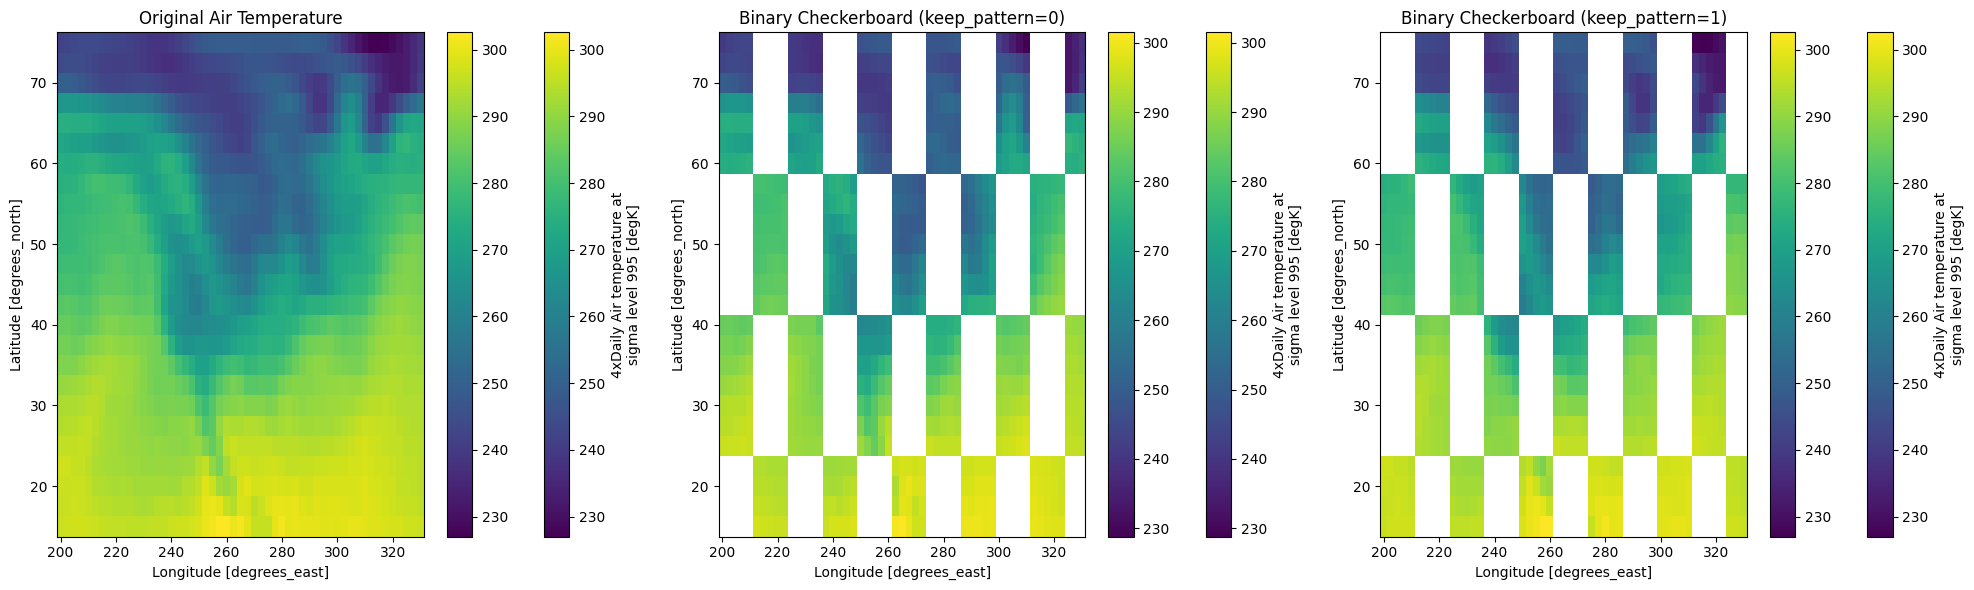


Updated Dataset:
<xarray.Dataset> Size: 31MB
Dimensions:             (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat                 (lat) float32 100B 75.0 72.5 70.0 ... 20.0 17.5 15.0
  * lon                 (lon) float32 212B 200.0 202.5 205.0 ... 327.5 330.0
  * time                (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T...
Data variables:
    air                 (time, lat, lon) float64 31MB 241.2 242.5 ... 295.7
    checkerboard_air_0  (lat, lon) float64 11kB 241.2 242.5 243.5 ... nan nan
    checkerboard_air_1  (lat, lon) float64 11kB nan nan nan ... 296.8 296.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Are all values from the original data preserved?
True

Percentage of data in pattern 0: 50.34%
Percentage of data in pattern 1: 49.6

In [38]:
# Load the example dataset
ds = xr.tutorial.load_dataset('air_temperature')

# Select a single time slice for simplicity
air_temp = ds.air.isel(time=0)

# Apply the checkerboard pattern for both parts of the binary pattern
square_size = (7, 5)  # 7x5 pixel squares
checkerboard_temp_0 = make_checkerboard_xr(air_temp, square_size, keep_pattern=0, validation=False)
checkerboard_temp_1 = make_checkerboard_xr(air_temp, square_size, keep_pattern=1, validation=False)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Original data
im0 = air_temp.plot(ax=axs[0], cmap='viridis')
axs[0].set_title('Original Air Temperature')
plt.colorbar(im0, ax=axs[0])

# Checkerboard pattern applied (keep_pattern=0)
im1 = checkerboard_temp_0.plot(ax=axs[1], cmap='viridis')
axs[1].set_title('Binary Checkerboard (keep_pattern=0)')
plt.colorbar(im1, ax=axs[1])

# Checkerboard pattern applied (keep_pattern=1)
im2 = checkerboard_temp_1.plot(ax=axs[2], cmap='viridis')
axs[2].set_title('Binary Checkerboard (keep_pattern=1)')
plt.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()

# You can also add these to your dataset
ds['checkerboard_air_0'] = checkerboard_temp_0
ds['checkerboard_air_1'] = checkerboard_temp_1

print("\nUpdated Dataset:")
print(ds)

# To verify that all data is preserved across the two patterns
combined = checkerboard_temp_0.fillna(0) + checkerboard_temp_1.fillna(0)
print("\nAre all values from the original data preserved?")
print(np.allclose(combined.values, air_temp.values))

# Calculate the percentage of data in each pattern
total_data_points = air_temp.size
data_points_0 = np.sum(~np.isnan(checkerboard_temp_0.values))
data_points_1 = np.sum(~np.isnan(checkerboard_temp_1.values))

print(f"\nPercentage of data in pattern 0: {data_points_0 / total_data_points * 100:.2f}%")
print(f"Percentage of data in pattern 1: {data_points_1 / total_data_points * 100:.2f}%")